# Data Analysis for Layer 2 Blockchain Historical Data

## Perform Exploratory Data Analysis

Loading the data

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/layer2-blockchain-historical-data/layer2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 185 entries, id to 1/21/23
dtypes: float64(181), object(4)
memory usage: 20.4+ KB


In [4]:
df.head(10)

,id,symbol,name,platforms,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,...,1/30/23,1/29/23,1/28/23,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23
0,matic-network,matic,Polygon,"""ethereum"": ""0x7d1afa7b718fb893db30a3abc0cfc60...",1.024530,0.989988,0.995025,0.998054,0.955388,0.994481,...,0.735782,0.741451,0.724706,0.848912,0.808997,0.799175,0.768094,0.778668,0.737500,0.737000
1,arbitrum,arb,Arbitrum,"""arbitrum-one"": ""0x912ce59144191c1204e64559fe8...",1.345063,1.345063,1.273497,1.235256,1.285561,1.165775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,optimism,op,Optimism,"""optimistic-ethereum"": ""0x42000000000000000000...",2.133840,2.214364,2.189817,2.184133,1.985411,2.380462,...,1.199195,1.222113,1.217410,1.367162,1.442016,1.454235,1.495643,1.480669,1.426603,1.608896
3,immutable-x,imx,ImmutableX,"""ethereum"": ""0xf57e7e7c23978c3caec3c3548e3d615...",0.637892,0.628872,0.669315,0.716426,0.645200,0.716249,...,0.695925,0.696516,0.692501,0.764921,0.747916,0.749877,0.741324,0.752112,0.728719,0.732196
4,loopring,lrc,Loopring,"""ethereum"": ""0xbbbbca6a901c926f240b89eacb641d8...",0.283048,0.273492,0.279036,0.289451,0.297735,0.303150,...,0.226799,0.227066,0.228069,0.242863,0.236324,0.238078,0.230410,0.237247,0.228179,0.228956
5,skale,skl,SKALE,"""ethereum"": ""0x00c83aecc790e8a4453e5dd3b0b4b36...",0.036178,0.033875,0.034561,0.035733,0.035968,0.034850,...,0.027610,0.027683,0.027462,0.029703,0.028615,0.029366,0.028515,0.029690,0.028649,0.029130
6,syscoin,sys,Syscoin,{},0.130255,0.134339,0.135350,0.157543,0.151702,0.158946,...,0.113271,0.119146,0.117533,0.120937,0.117994,0.119243,0.115066,0.114333,0.111993,0.112994
7,metis-token,metis,Metis,"""ethereum"": ""0x9e32b13ce7f2e80a01932b42553652e...",22.252486,22.427300,21.900591,25.617525,24.209226,27.468817,...,17.507403,17.852104,18.218813,18.825803,18.105149,17.865218,17.487637,17.309903,17.040781,16.994782
8,coinweb,cweb,Coinweb,"""ethereum"": ""0x505b5eda5e25a67e1c24a2bf1a527ed...",0.011760,0.012077,0.012515,0.013282,0.012971,0.013170,...,0.022940,0.022952,0.022782,0.022223,0.022000,0.022015,0.021697,0.020978,0.021166,0.021421
9,boba-network,boba,Boba Network,"""ethereum"": ""0x42bbfa2e77757c645eeaad1655e0911...",0.212972,0.210179,0.201475,0.221537,0.229548,0.228569,...,0.135090,0.134367,0.135069,0.138977,0.137845,0.137527,0.134688,0.135354,0.136060,0.132877


In [5]:
# Check for missing values in each column
print(df.isnull().sum())

id           0
symbol       0
name         0
platforms    0
7/20/23      0
            ..
1/25/23      3
1/24/23      3
1/23/23      3
1/22/23      3
1/21/23      3
Length: 185, dtype: int64


We can see the data itself has a few missing value, but it may crucial to determining trends of L2 layer, for now we just delete the NaN data.

In [6]:
print(df['platforms'].head(30))

0     "ethereum": "0x7d1afa7b718fb893db30a3abc0cfc60...
1     "arbitrum-one": "0x912ce59144191c1204e64559fe8...
2     "optimistic-ethereum": "0x42000000000000000000...
3     "ethereum": "0xf57e7e7c23978c3caec3c3548e3d615...
4     "ethereum": "0xbbbbca6a901c926f240b89eacb641d8...
5     "ethereum": "0x00c83aecc790e8a4453e5dd3b0b4b36...
6                                                    {}
7     "ethereum": "0x9e32b13ce7f2e80a01932b42553652e...
8     "ethereum": "0x505b5eda5e25a67e1c24a2bf1a527ed...
9     "ethereum": "0x42bbfa2e77757c645eeaad1655e0911...
10    "ethereum": "0x53c8395465a84955c95159814461466...
11    "ethereum": "0xe4815ae53b124e7263f08dcdbbb757d...
12                                                   {}
13     "cosmos": "ibc/00F2B62EB069321A454B708876476A...
Name: platforms, dtype: object


In [7]:
import re

# Function to clean and parse the 'platforms' column
def parse_platforms(platform_str):
    if pd.isna(platform_str) or platform_str.strip() == "{}":
        return None, None
    # Example pattern: '"key": "value"'
    pattern = r'"(\w+)": "([^"]+)"'
    match = re.search(pattern, platform_str)
    if match:
        return match.group(1), match.group(2)
    return None, None

# Apply the function to the 'platforms' column and create new columns
df['platform_name'], df['platform_address'] = zip(*df['platforms'].apply(parse_platforms))

In [8]:
# Display the results
df[['platforms', 'platform_name', 'platform_address']].head(30)

,platforms,platform_name,platform_address
0,"""ethereum"": ""0x7d1afa7b718fb893db30a3abc0cfc60...",ethereum,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0
1,"""arbitrum-one"": ""0x912ce59144191c1204e64559fe8...",ethereum,0xb50721bcf8d664c30412cfbc6cf7a15145234ad1
2,"""optimistic-ethereum"": ""0x42000000000000000000...",None,None
3,"""ethereum"": ""0xf57e7e7c23978c3caec3c3548e3d615...",ethereum,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff
4,"""ethereum"": ""0xbbbbca6a901c926f240b89eacb641d8...",ethereum,0xbbbbca6a901c926f240b89eacb641d8aec7aeafd
5,"""ethereum"": ""0x00c83aecc790e8a4453e5dd3b0b4b36...",ethereum,0x00c83aecc790e8a4453e5dd3b0b4b3680501a7a7
6,{},None,None
7,"""ethereum"": ""0x9e32b13ce7f2e80a01932b42553652e...",ethereum,0x9e32b13ce7f2e80a01932b42553652e053d6ed8e
8,"""ethereum"": ""0x505b5eda5e25a67e1c24a2bf1a527ed...",ethereum,0x505b5eda5e25a67e1c24a2bf1a527ed9eb88bf04
9,"""ethereum"": ""0x42bbfa2e77757c645eeaad1655e0911...",ethereum,0x42bbfa2e77757c645eeaad1655e0911a7553efbc


In [9]:
df_2 = df

In [10]:
# Assuming df_2 is your DataFrame
df_2.drop(['platforms'], axis=1, inplace=True)

# Print the updated DataFrame to verify
df_2.head()

,id,symbol,name,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,7/14/23,...,1/28/23,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23,platform_name,platform_address
0,matic-network,matic,Polygon,1.024530,0.989988,0.995025,0.998054,0.955388,0.994481,1.109654,...,0.724706,0.848912,0.808997,0.799175,0.768094,0.778668,0.737500,0.737000,ethereum,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0
1,arbitrum,arb,Arbitrum,1.345063,1.345063,1.273497,1.235256,1.285561,1.165775,1.217131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethereum,0xb50721bcf8d664c30412cfbc6cf7a15145234ad1
2,optimism,op,Optimism,2.133840,2.214364,2.189817,2.184133,1.985411,2.380462,2.218329,...,1.217410,1.367162,1.442016,1.454235,1.495643,1.480669,1.426603,1.608896,None,None
3,immutable-x,imx,ImmutableX,0.637892,0.628872,0.669315,0.716426,0.645200,0.716249,0.679330,...,0.692501,0.764921,0.747916,0.749877,0.741324,0.752112,0.728719,0.732196,ethereum,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff
4,loopring,lrc,Loopring,0.283048,0.273492,0.279036,0.289451,0.297735,0.303150,0.317142,...,0.228069,0.242863,0.236324,0.238078,0.230410,0.237247,0.228179,0.228956,ethereum,0xbbbbca6a901c926f240b89eacb641d8aec7aeafd


In [11]:
# Display column names and data types
column_info = df_2.dtypes.rename('dtype').reset_index()

# Count null values per column
null_counts = df_2.isnull().sum().rename('null_count').reset_index()

# Merge column information and null counts
summary = pd.merge(column_info, null_counts, on='index')

# Display the compact summary
summary

,index,dtype,null_count
0,id,object,0
1,symbol,object,0
2,name,object,0
3,7/20/23,float64,0
4,7/19/23,float64,0
...,...,...,...
181,1/23/23,float64,3
182,1/22/23,float64,3
183,1/21/23,float64,3
184,platform_name,object,3


In [12]:
# Create a DataFrame for rows with null platform_name
df_null_platform = df_2[df_2['platform_name'].isnull()]

# Print the first few rows to verify
print("DataFrame with null platform:")
df_null_platform.head()

DataFrame with null platform:


,id,symbol,name,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,7/14/23,...,1/28/23,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23,platform_name,platform_address
2,optimism,op,Optimism,2.133840,2.214364,2.189817,2.184133,1.985411,2.380462,2.218329,...,1.217410,1.367162,1.442016,1.454235,1.495643,1.480669,1.426603,1.608896,None,None
6,syscoin,sys,Syscoin,0.130255,0.134339,0.135350,0.157543,0.151702,0.158946,0.155297,...,0.117533,0.120937,0.117994,0.119243,0.115066,0.114333,0.111993,0.112994,None,None
12,xdai,xdai,XDAI,0.999046,0.997106,0.998024,0.996789,0.994184,0.998094,1.009750,...,1.001916,0.993320,1.006851,1.002596,0.999048,0.993224,0.995170,0.993618,None,None


In [13]:
# Drop rows with null values in the 'platform_name' column
df_2.dropna(subset=['platform_name'], inplace=True)

df_2.isnull().sum()
df_2.head()

,id,symbol,name,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,7/14/23,...,1/28/23,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23,platform_name,platform_address
0,matic-network,matic,Polygon,1.024530,0.989988,0.995025,0.998054,0.955388,0.994481,1.109654,...,0.724706,0.848912,0.808997,0.799175,0.768094,0.778668,0.737500,0.737000,ethereum,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0
1,arbitrum,arb,Arbitrum,1.345063,1.345063,1.273497,1.235256,1.285561,1.165775,1.217131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethereum,0xb50721bcf8d664c30412cfbc6cf7a15145234ad1
3,immutable-x,imx,ImmutableX,0.637892,0.628872,0.669315,0.716426,0.645200,0.716249,0.679330,...,0.692501,0.764921,0.747916,0.749877,0.741324,0.752112,0.728719,0.732196,ethereum,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff
4,loopring,lrc,Loopring,0.283048,0.273492,0.279036,0.289451,0.297735,0.303150,0.317142,...,0.228069,0.242863,0.236324,0.238078,0.230410,0.237247,0.228179,0.228956,ethereum,0xbbbbca6a901c926f240b89eacb641d8aec7aeafd
5,skale,skl,SKALE,0.036178,0.033875,0.034561,0.035733,0.035968,0.034850,0.036973,...,0.027462,0.029703,0.028615,0.029366,0.028515,0.029690,0.028649,0.029130,ethereum,0x00c83aecc790e8a4453e5dd3b0b4b3680501a7a7


In [ ]:
df_2.info

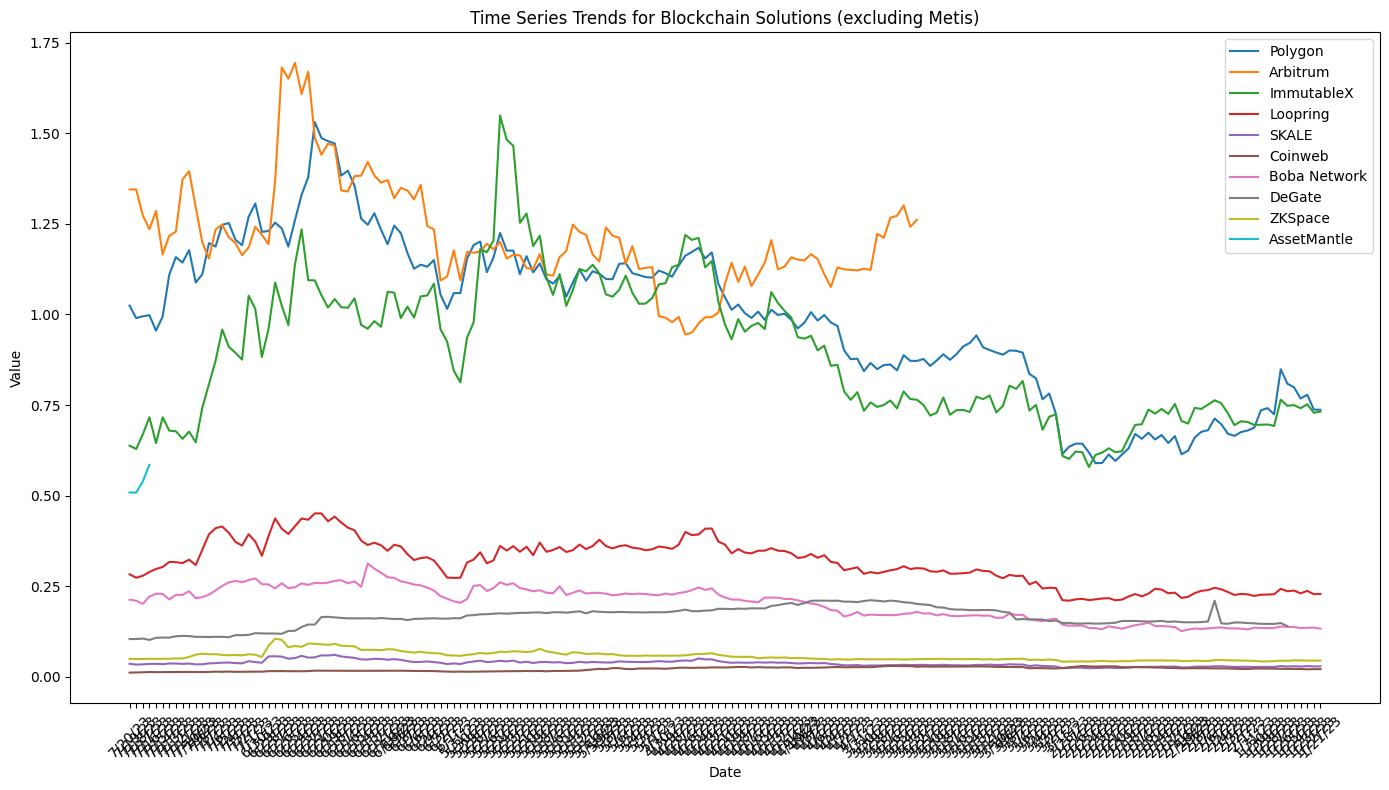

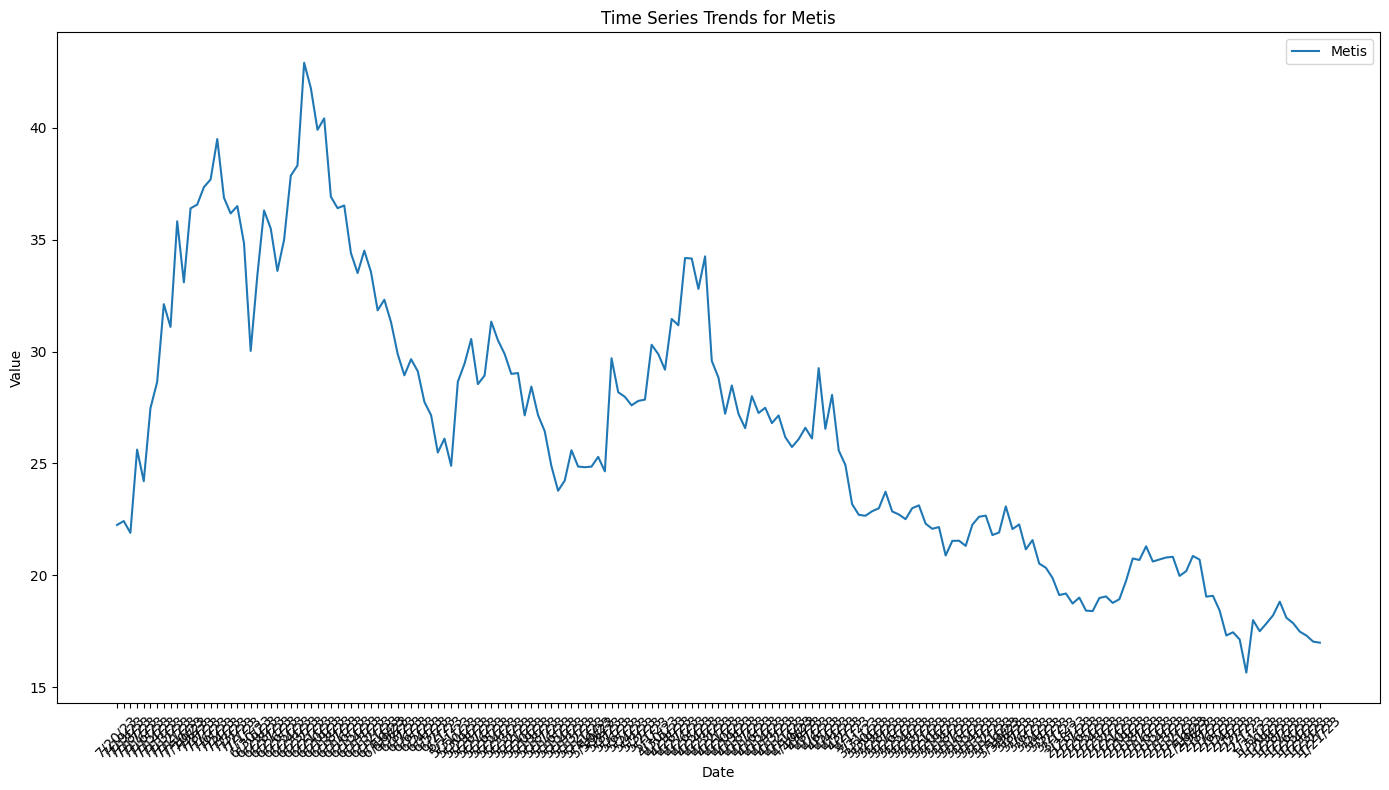

In [15]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
time_series_columns = df_2.columns[df_2.columns.str.match(r'\d{1,2}/\d{1,2}/\d{2}')].tolist()
name_column = 'name'  # Assuming 'name' column contains different blockchain solution names

# Filter rows where 'name' is 'Metis'
metis_data = df_2[df_2[name_column] == 'Metis']

# Plotting time series for each 'name' except 'Metis'
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed

for index, row in df_2[df_2[name_column] != 'Metis'].iterrows():
    name = row[name_column]
    time_series_data = row[time_series_columns]
    plt.plot(time_series_columns, time_series_data, label=name)

plt.title('Time Series Trends for Blockchain Solutions (excluding Metis)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting time series for 'Metis'
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed

for index, row in metis_data.iterrows():
    name = row[name_column]
    time_series_data = row[time_series_columns]
    plt.plot(time_series_columns, time_series_data, label=name)

plt.title('Time Series Trends for Metis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

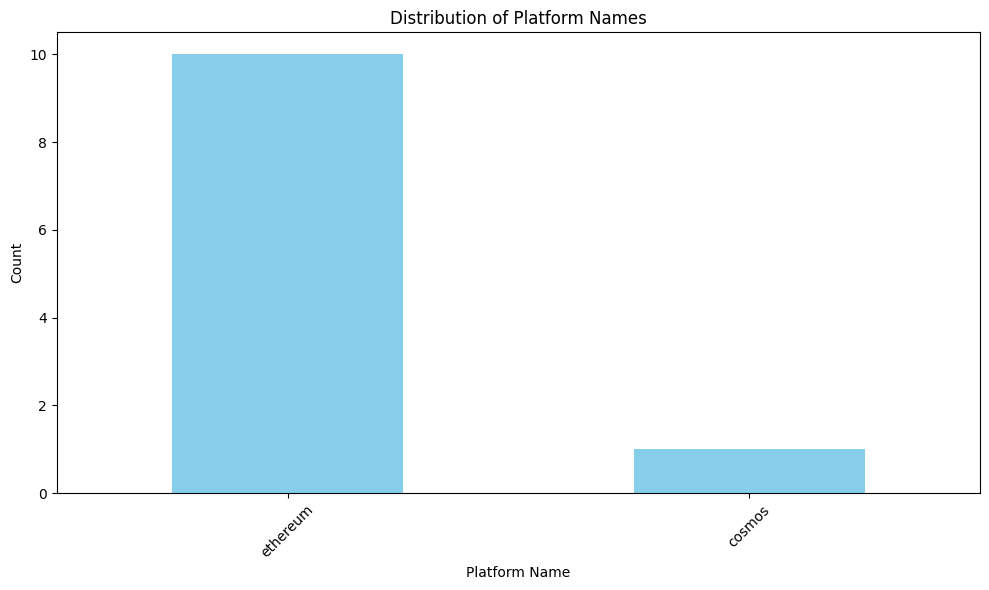

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each platform_name
platform_counts = df_2['platform_name'].value_counts()

# Plotting the distribution of platform_name
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Platform Names')
plt.xlabel('Platform Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df_2_cleaned = df_2[~df_2['name'].isin(['Arbitrum', 'AssetMantle', 'DeGate'])]
df_2_cleaned.head(50)

,id,symbol,name,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,7/14/23,...,1/28/23,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23,platform_name,platform_address
0,matic-network,matic,Polygon,1.024530,0.989988,0.995025,0.998054,0.955388,0.994481,1.109654,...,0.724706,0.848912,0.808997,0.799175,0.768094,0.778668,0.737500,0.737000,ethereum,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0
3,immutable-x,imx,ImmutableX,0.637892,0.628872,0.669315,0.716426,0.645200,0.716249,0.679330,...,0.692501,0.764921,0.747916,0.749877,0.741324,0.752112,0.728719,0.732196,ethereum,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff
4,loopring,lrc,Loopring,0.283048,0.273492,0.279036,0.289451,0.297735,0.303150,0.317142,...,0.228069,0.242863,0.236324,0.238078,0.230410,0.237247,0.228179,0.228956,ethereum,0xbbbbca6a901c926f240b89eacb641d8aec7aeafd
5,skale,skl,SKALE,0.036178,0.033875,0.034561,0.035733,0.035968,0.034850,0.036973,...,0.027462,0.029703,0.028615,0.029366,0.028515,0.029690,0.028649,0.029130,ethereum,0x00c83aecc790e8a4453e5dd3b0b4b3680501a7a7
7,metis-token,metis,Metis,22.252486,22.427300,21.900591,25.617525,24.209226,27.468817,28.635478,...,18.218813,18.825803,18.105149,17.865218,17.487637,17.309903,17.040781,16.994782,ethereum,0x9e32b13ce7f2e80a01932b42553652e053d6ed8e
8,coinweb,cweb,Coinweb,0.011760,0.012077,0.012515,0.013282,0.012971,0.013170,0.013427,...,0.022782,0.022223,0.022000,0.022015,0.021697,0.020978,0.021166,0.021421,ethereum,0x505b5eda5e25a67e1c24a2bf1a527ed9eb88bf04
9,boba-network,boba,Boba Network,0.212972,0.210179,0.201475,0.221537,0.229548,0.228569,0.213519,...,0.135069,0.138977,0.137845,0.137527,0.134688,0.135354,0.136060,0.132877,ethereum,0x42bbfa2e77757c645eeaad1655e0911a7553efbc
11,zkspace,zks,ZKSpace,0.049805,0.049104,0.049449,0.049659,0.049769,0.049578,0.049862,...,0.043659,0.044706,0.044211,0.045617,0.045135,0.044952,0.044845,0.044840,ethereum,0xe4815ae53b124e7263f08dcdbbb757d41ed658c6


## Performing a Clustering to Categorized Potential of Each Coins

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
time_series_df = df_2_cleaned.drop(columns=['id', 'symbol', 'name', 'platform_name', 'platform_address'])

In [20]:
scaler = StandardScaler()
time_series_scaled = scaler.fit_transform(time_series_df)

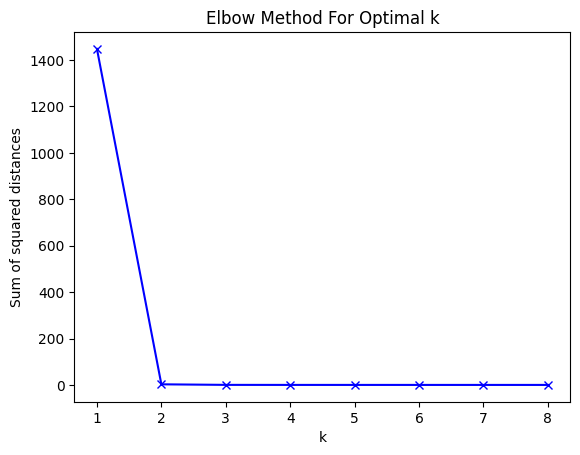

In [21]:
sum_of_squared_distances = []
K = range(1, 9)  # Adjust the range to the number of samples
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to suppress the warning
    kmeans = kmeans.fit(time_series_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
optimal_clusters = 3  # Example value; adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
kmeans.fit(time_series_scaled)

KMeans(n_clusters=3, n_init=10)

In [23]:
df_2_cleaned['cluster'] = kmeans.labels_

/tmp/ipykernel_33/3789852718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned['cluster'] = kmeans.labels_


In [26]:
df_2_cleaned.head(30)

,id,symbol,name,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,7/14/23,...,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23,platform_name,platform_address,cluster
0,matic-network,matic,Polygon,1.024530,0.989988,0.995025,0.998054,0.955388,0.994481,1.109654,...,0.848912,0.808997,0.799175,0.768094,0.778668,0.737500,0.737000,ethereum,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0
3,immutable-x,imx,ImmutableX,0.637892,0.628872,0.669315,0.716426,0.645200,0.716249,0.679330,...,0.764921,0.747916,0.749877,0.741324,0.752112,0.728719,0.732196,ethereum,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,0
4,loopring,lrc,Loopring,0.283048,0.273492,0.279036,0.289451,0.297735,0.303150,0.317142,...,0.242863,0.236324,0.238078,0.230410,0.237247,0.228179,0.228956,ethereum,0xbbbbca6a901c926f240b89eacb641d8aec7aeafd,2
5,skale,skl,SKALE,0.036178,0.033875,0.034561,0.035733,0.035968,0.034850,0.036973,...,0.029703,0.028615,0.029366,0.028515,0.029690,0.028649,0.029130,ethereum,0x00c83aecc790e8a4453e5dd3b0b4b3680501a7a7,2
7,metis-token,metis,Metis,22.252486,22.427300,21.900591,25.617525,24.209226,27.468817,28.635478,...,18.825803,18.105149,17.865218,17.487637,17.309903,17.040781,16.994782,ethereum,0x9e32b13ce7f2e80a01932b42553652e053d6ed8e,1
8,coinweb,cweb,Coinweb,0.011760,0.012077,0.012515,0.013282,0.012971,0.013170,0.013427,...,0.022223,0.022000,0.022015,0.021697,0.020978,0.021166,0.021421,ethereum,0x505b5eda5e25a67e1c24a2bf1a527ed9eb88bf04,2
9,boba-network,boba,Boba Network,0.212972,0.210179,0.201475,0.221537,0.229548,0.228569,0.213519,...,0.138977,0.137845,0.137527,0.134688,0.135354,0.136060,0.132877,ethereum,0x42bbfa2e77757c645eeaad1655e0911a7553efbc,2
11,zkspace,zks,ZKSpace,0.049805,0.049104,0.049449,0.049659,0.049769,0.049578,0.049862,...,0.044706,0.044211,0.045617,0.045135,0.044952,0.044845,0.044840,ethereum,0xe4815ae53b124e7263f08dcdbbb757d41ed658c6,2


In [27]:
cluster_potential = {0: 'High', 1: 'Medium', 2: 'Low'}  # Example mapping
df_2_cleaned['potential'] = df_2_cleaned['cluster'].map(cluster_potential)

/tmp/ipykernel_33/1133456417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned['potential'] = df_2_cleaned['cluster'].map(cluster_potential)


In [ ]:
df_2_cleaned = df_2_cleaned.drop(columns=['cluster'])

In [31]:
df_2_cleaned.head()

,id,symbol,name,7/20/23,7/19/23,7/18/23,7/17/23,7/16/23,7/15/23,7/14/23,...,1/27/23,1/26/23,1/25/23,1/24/23,1/23/23,1/22/23,1/21/23,platform_name,platform_address,potential
0,matic-network,matic,Polygon,1.024530,0.989988,0.995025,0.998054,0.955388,0.994481,1.109654,...,0.848912,0.808997,0.799175,0.768094,0.778668,0.737500,0.737000,ethereum,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,High
3,immutable-x,imx,ImmutableX,0.637892,0.628872,0.669315,0.716426,0.645200,0.716249,0.679330,...,0.764921,0.747916,0.749877,0.741324,0.752112,0.728719,0.732196,ethereum,0xf57e7e7c23978c3caec3c3548e3d615c346e79ff,High
4,loopring,lrc,Loopring,0.283048,0.273492,0.279036,0.289451,0.297735,0.303150,0.317142,...,0.242863,0.236324,0.238078,0.230410,0.237247,0.228179,0.228956,ethereum,0xbbbbca6a901c926f240b89eacb641d8aec7aeafd,Low
5,skale,skl,SKALE,0.036178,0.033875,0.034561,0.035733,0.035968,0.034850,0.036973,...,0.029703,0.028615,0.029366,0.028515,0.029690,0.028649,0.029130,ethereum,0x00c83aecc790e8a4453e5dd3b0b4b3680501a7a7,Low
7,metis-token,metis,Metis,22.252486,22.427300,21.900591,25.617525,24.209226,27.468817,28.635478,...,18.825803,18.105149,17.865218,17.487637,17.309903,17.040781,16.994782,ethereum,0x9e32b13ce7f2e80a01932b42553652e053d6ed8e,Medium


In [32]:
df_2_cleaned.to_csv('categorized_coins.csv', index=False)